Step 1: Loading the dataset  


In [46]:
# mnist is in stored in keras dataset, so we load the dataset from there 
from keras.datasets import mnist 

# mnist dataset in keras is the set of 4 numpy arrays (train_sample & label)
# (test_samples & labels)

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# The images are encoded as Numpy arrays and the labels as array of digits
# ranging from 0 to 9 

Step 2: Analyzing the dataset 

In [2]:
# lets look at the training data 

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.shape[0] # total samples of training dataset 

60000

In [5]:
train_images.shape[1:] # size of each example(image)

(28, 28)

In [6]:
train_labels.shape # labels returns in tuple 

(60000,)

In [7]:
len(train_labels) # returns a value 

60000

In [8]:
# lets look at the testing dataset 

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_images.shape[0]

10000

In [11]:
test_images.shape[1:]

(28, 28)

In [12]:
len(test_labels)

10000

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
len(test_images)

10000

In [15]:
test_images[len(test_images)-1] # it can go from 0 to len(test_images-1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   8, 117, 254, 220,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  95, 212, 253, 253, 253, 157,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         16,  95, 209, 253, 253, 253, 245, 125,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40,  96,
        206, 253, 254, 253, 253, 198,  64,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Step 3: Visulize dataset with matplotlib

In [16]:
import matplotlib.pyplot as plt

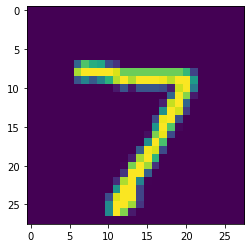

In [17]:
plt.imshow(test_images[0],aspect='equal')

Step 4: Build the Network Architecture 

In [60]:
from keras import models
from keras import layers 
# from tensorflow.python.keras import backend as k

In [61]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [23]:
train_images.shape[1]

28

In [24]:
train_images.shape[2]

28

In [28]:
network = models.Sequential()

In [26]:
28*28

784

Step 5: To make the Network ready for training, we need to pick three more things as a part of the compilation step:
    * Loss Function: to check the how much difference in the targeted and the predicted output by the network (the network will be able to measure  its performance on the training data)
    * Optimizer: on the basis of loss function and the data see by network  it updates the network to get close to the desired output 
    * Metrics: It measures the performance of the network on training and testing data, we are using accuracy to check how much examples classified by the networks are correct

In [52]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy'
                ,metrics=['accuracy']) 

Step 6: Preparing the Image data for training (to fatten it) & scale it in the range [0:1]

In [48]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [47]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

Step 7: Preparing the labels (its mean we do one hot encoding) the place where label exist it is 1 and others 0  

In [49]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [54]:
test_labels.shape

(10000, 10)

Step 8: Fit (start training) the model to the training data 

In [50]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.2558 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.1033 - acc: 0.9691 0s - loss: 0.1034 - acc: 0.969
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.0678 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.0497 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0369 - acc: 0.9888


Step 9: Predictions on the test dataset 

In [55]:
test_loss,test_acc = network.evaluate(test_images,test_labels)
print("test loss : ",test_loss)
print("test accuracy : ",test_acc)

10000/10000 [==============================] - 1s 112us/step
test loss :  0.06671233297714498
test accuracy :  0.9804


Conclusion: As the test accuracy is bit lower than the training accuracy its because of the overfitting of model, that means the trained network instead of generalizing remeber taring examples to some extent  